
# 🎬 시나리오 기반 머신러닝 미션: 마케팅 전략과 건강 예측의 과학

당신은 데이터 과학자로 고용된 **헬스&뷰티 스타트업**의 분석 팀장입니다.  
회사의 마케팅 부서는 **광고 예산이 매출에 어떤 영향을 주는지**를 알고 싶어 하고,  
제품 개발 부서는 **사용자의 건강 데이터를 기반으로 당뇨병 위험군을 조기에 예측**하고자 합니다.

이번 프로젝트의 목표는 다음과 같습니다:

- 📈 **광고 채널별 효과 분석**을 통해 최적의 마케팅 예산 배분 전략을 수립한다.
- 🧪 **정규화 회귀 모델**을 통해 중요하지 않은 변수를 제거하고 모델 해석력을 높인다.
- ❤️ **건강 진단 데이터**를 통해 당뇨병 고위험군을 조기에 예측하여 건강 서비스를 제안한다.

이 시나리오를 바탕으로 실제 데이터를 분석하고 예측 모델을 만들어봅시다!


## 🎯 미션 1: 선형회귀 (Linear Regression)

설명: TV, 라디오, 신문 광고 예산에 따른 제품 매출을 예측하는 선형 회귀 모델을 만들어보세요.

데이터: Advertising.csv (TV, Radio, Newspaper, Sales)

지시사항:

1. 데이터셋을 불러오고 탐색하세요.

2. TV, Radio, Newspaper를 feature로 하여 Sales를 예측하는 선형 회귀 모델을 만들어보세요.

3. 예측 정확도를 R² score로 확인하세요.

4. 각 feature의 계수를 해석해보세요.
- 기울기 [0.04472952 0.18919505 0.00276111]
    - TV광고비가 1단위 증가할때 매출은 평균 0.0447 증가
    - Radio광고비가 1단위 증가할때, 매출은 평균 0.1891 증가
    - Newspaper광고비의 계수가 거의 0에 가깝기 때문에 매출에 영향이 없다


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 데이터 로드
# 데이터 URL
url = "https://raw.githubusercontent.com/chandanverma07/DataSets/master/Advertising.csv"

# 데이터 불러오기
df = pd.read_csv(url)

print(df.head())

# 독립변수, 종속변수 설정
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# 학습용/테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression().fit(X_train,y_train)

print("기울기",lr.coef_)
print("절편:",lr.intercept_)

print("훈련 데이터 R² 점수:", lr.score(X_train, y_train))
print("테스트 데이터 R² 점수(반올림):", round(lr.score(X_test, y_test), 3))

import numpy as np
print(X_train.shape)

X_new = np.array([[100, 20, 30]])
print(type(X_new))
print(X_new.shape)

result = lr.predict(X_new)
print(result)

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
기울기 [0.04472952 0.18919505 0.00276111]
절편: 2.979067338122629
훈련 데이터 R² 점수: 0.8957008271017818
테스트 데이터 R² 점수(반올림): 0.899
(160, 3)
<class 'numpy.ndarray'>
(1, 3)
[11.3187536]


C:\Users\sohee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



## 🎯 미션 1-2: 릿지 회귀 (Ridge Regression)

**설명**: L2 정규화를 통해 과적합을 방지하고 모델의 안정성을 확보합니다.
설명: 같은 데이터를 사용하되 릿지 회귀로 정규화 효과를 확인해보세요.

지시사항:

1. 동일한 feature로 릿지 회귀 모델을 학습시키되, alpha 값을 [0.01, 1, 100]로 설정해 비교하세요.

2. 각 모델의 계수 변화와 R² 점수를 시각화하세요.

3. 어떤 alpha 값이 가장 좋은 성능을 보였는지 해석해보세요.


알파 값: 0.01
기울기: [0.04416235 0.19900361 0.00116269]
절편: 2.8925712077483627
훈련 데이터 R² 점수: 0.9072183330816963
테스트 데이터 R² 점수(반올림): 0.858
***********
알파 값: 1
기울기: [0.04416232 0.19899704 0.00116411]
절편: 2.8926857076489885
훈련 데이터 R² 점수: 0.9072183327469391
테스트 데이터 R² 점수(반올림): 0.858
***********
알파 값: 100
기울기: [0.04415983 0.19834233 0.00130496]
절편: 2.904103581005833
훈련 데이터 R² 점수: 0.9072150081954864
테스트 데이터 R² 점수(반올림): 0.858
***********


C:\Users\sohee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sohee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sohee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sohee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sohee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

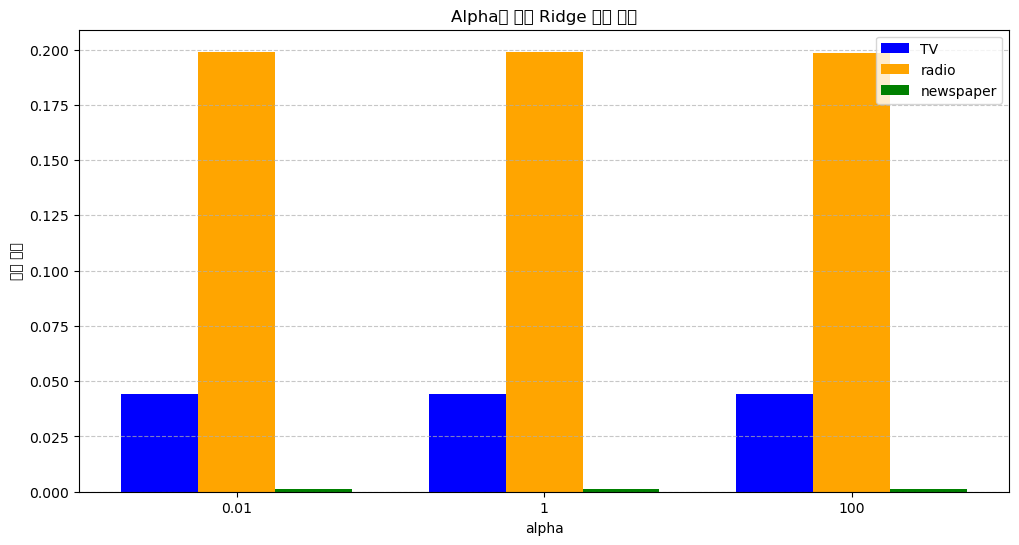

C:\Users\sohee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sohee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sohee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sohee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sohee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_i

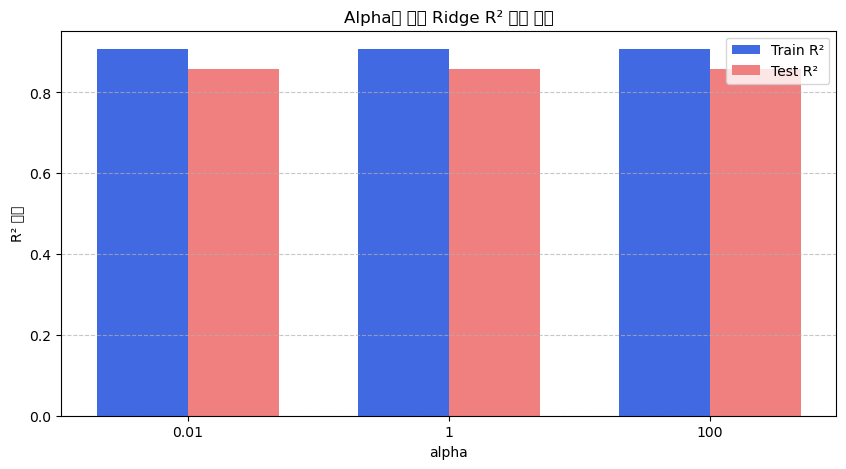

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
alphas = [0.01, 1, 100]
coefs = []
train_scores = []
test_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    
    print("알파 값:", alpha)
    print("기울기:", ridge.coef_)
    print("절편:", ridge.intercept_)
    print("훈련 데이터 R² 점수:", ridge.score(X_train, y_train))
    print("테스트 데이터 R² 점수(반올림):", round(ridge.score(X_test, y_test), 3))
    print("***********")
    
    coefs.append(ridge.coef_)
    train_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))

# 계수 변화 바 그래프 시각화
plt.figure(figsize=(12, 6))
x = np.arange(len(alphas))
width = 0.25

features = ['TV', 'radio', 'newspaper']
colors = ['blue', 'orange', 'green']

for i, feature in enumerate(features):
    plt.bar(x + width*(i-1), [coef[i] for coef in coefs], width, label=feature, color=colors[i])

plt.xlabel("alpha")
plt.ylabel("계수 크기")
plt.title("Alpha에 따른 Ridge 계수 변화")
plt.xticks(x, [str(alpha) for alpha in alphas])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# R² 점수 바 그래프 시각화
plt.figure(figsize=(10, 5))
x = np.arange(len(alphas))
width = 0.35

plt.bar(x - width/2, train_scores, width, label="Train R²", color='royalblue')
plt.bar(x + width/2, test_scores, width, label="Test R²", color='lightcoral')

plt.xlabel("alpha")
plt.ylabel("R² 점수")
plt.title("Alpha에 따른 Ridge R² 점수 변화")
plt.xticks(x, [str(alpha) for alpha in alphas])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 🎯 미션 1-3: 라쏘 회귀 (Lasso Regression)


설명: Lasso 회귀는 불필요한 feature의 계수를 0으로 만드는 특성이 있습니다.

지시사항:

1. alpha 값을 [0.01, 1, 100]로 조절하여 Lasso 회귀 모델을 학습시키세요.

2. 계수가 0이 되는 feature가 있는지 확인하고 시각화하세요.

3. 어떤 변수가 모델에서 제외되었는지 해석해보세요.


from sklearn.linear_model import Lasso

alphas = [0.01, 1, 100]
